In [37]:
import pandas as pd
at = pd.read_excel("../resources/Video_List.ods")

In [38]:
at

,Video_Number,VideoID,FileName,Experiment_Type,Category,Source_Dataset,Source_Movie,Video_Duration
0,1,10,'10.avi',Short_Videos,HVLA,DECAF,August Rush,01:30:00
1,2,13,'13.avi',Short_Videos,HVLA,DECAF,Love Actually,00:51:00
2,3,138,'138.avi',Short_Videos,LVLA,MAHNOB-HCI,The Thin Red Line,01:56:00
3,4,18,'18.avi',Short_Videos,HVLA,DECAF,House of Flying Daggers,01:17:00
4,5,19,'19.wmv',Short_Videos,LVLA,DECAF,The Exorcist,02:00:00
5,6,20,'20.avi',Short_Videos,LVLA,DECAF,My Girl,01:00:00
6,7,23,'23.wmv',Short_Videos,LVLA,DECAF,My Bodyguard,01:46:00
7,8,30,'30.avi',Short_Videos,LVHA,MAHNOB-HCI,Silent Hill,01:10:00
8,9,31,'31.wmv',Short_Videos,LVHA,DECAF,Prestige,02:30:00
9,10,34,'34.avi',Short_Videos,LVHA,DECAF,Pink Flamingos,01:00:00


In [ ]:
# **Notebook in cui abbozzo le cose e vedo di farle andare **
# Al momento non mi fa il rendering di testo Markdown quindi commento in celle.

In [ ]:
"""
## AMIGOS

A data file (pre-processed) is relative to a specific participant from the name ex. [Data_Preprocessed_P01] -> Participant 1

> The videos are in the order of Video_Number (See Video_List), so not in the order of presentation.
This means the first video is the same for each participant. The following table shows the channel layout and the preprocessing performed:

Each matrix is a video.

Root level:
    dict_keys(['__header__', '__version__', '__globals__', 'VideoIDs', 'joined_data', 'labels_ext_annotation', 'labels_selfassessment'])

YY: are the trials

joined_data  {1,YY}: Contiene gli esperimenti (Che sono una quantità definita: )
    samples: XX x 17 (XX numero di samples per le 17 dimensioni processate).

labels_ext_anotation {1,YY}: ZZ x 3 channels (segment_index, valence and arousal)

"""

In [ ]:
frequency = 128  # As stated by dataset after pre-processing 128Hz

In [2]:
from scipy.io import loadmat

mat = loadmat("../resources/Data_Preprocessed_P01.mat")

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'VideoIDs', 'joined_data', 'labels_ext_annotation', 'labels_selfassessment'])

In [9]:
mat['joined_data'].shape  # 1 x YY (The 20 videos data)

(20,)

In [33]:
# First dimension is kinda lost (No use for it actually)s
video = 0

video_data = mat['joined_data'][0][video]
video_data.shape  # (Sampling points x channels)

(12225, 17)

In [34]:
print(f"Video n.{video} lasts {video_data.shape[0] / 128} seconds")

Video n.0 lasts 95.5078125 seconds


With frequency 128  we have that our series lasts:  95.5078125


<module 'matplotlib.pyplot' from '/home/jacopo/PycharmProjects/progetto-tesi/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

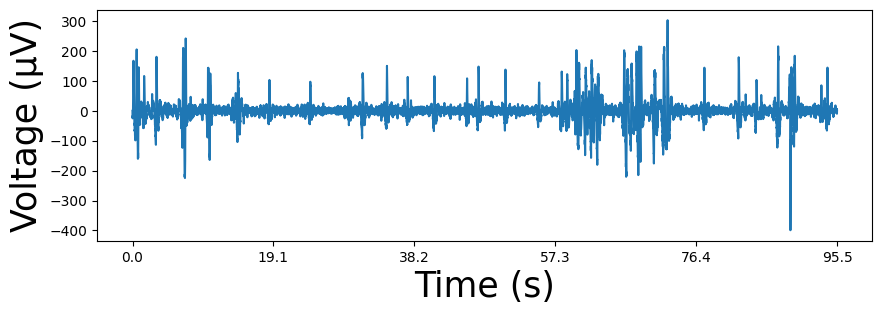

In [35]:
from eeg.plotting import plot_time_series

# Channel AF3
eeg = video_data.T  # Shape becomes (17, 12225)
plot_time_series(eeg[0], ticks=5, frequency=128)

In [4]:
# Joined data last 3 rows are relative to ECG and GSR.
# Should we drop them? TODO

In [5]:
eeg = mat['joined_data'][0][0].T  # Shape becomes (17, 12225)

In [6]:
eeg[0]

array([ 9.73663478e-06, -4.13422856e+00, -1.82200587e+01, ...,
       -9.87916955e+00, -1.20316206e+00,  6.66026951e-06], shape=(12225,))

With frequency 128  we have that our series lasts:  95.5078125


<module 'matplotlib.pyplot' from '/home/jacopo/PycharmProjects/progetto-tesi/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

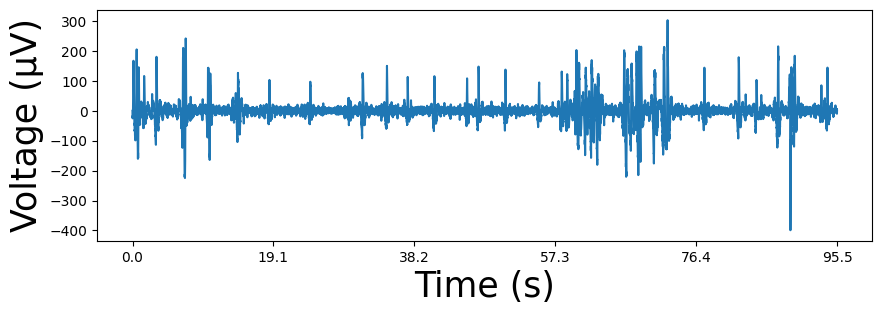

In [7]:
from eeg.plotting import plot_time_series

# Channel AF3
eeg = mat['joined_data'][0][0].T  # Shape becomes (17, 12225)
plot_time_series(eeg[0], ticks=5, frequency=frequency)

In [12]:
mat['labels_ext_annotation'][0][0].shape

(6, 3)

##

In [14]:
%%sql


InvalidInputException: Invalid Input Error: Python Object "mat" of type "dict" found on line "/tmp/ipykernel_97515/748881735.py:1" not suitable for replacement scans.
Make sure that "mat" is either a pandas.DataFrame, duckdb.DuckDBPyRelation, pyarrow Table, Dataset, RecordBatchReader, Scanner, or NumPy ndarrays with supported format